# Building Random Forest Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
# from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay
import shap

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

In [3]:
print(X.shape)

(20640, 8)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Feature Importance

One of the most straightforward ways to interpret a random forest model is to examine feature importance scores. These scores indicate how much each feature contributes to the model's predictive accuracy. Higher importance values suggest that a feature has a more significant impact on the model's predictions.

In [6]:
# Feature Importance
feature_importance = rf_model.feature_importances_

In [7]:
# Print feature importance scores
for feature, score in zip(feature_names, feature_importance):
    print(f"{feature}: {score:.3f}")

MedInc: 0.525
HouseAge: 0.055
AveRooms: 0.044
AveBedrms: 0.030
Population: 0.031
AveOccup: 0.138
Latitude: 0.089
Longitude: 0.089


# Partial Dependence Plots

Partial dependence plots (PDPs) show how the predicted outcome changes with variations in a specific feature while holding all other features constant. PDPs can provide insights into the relationship between individual features and the target variable. 

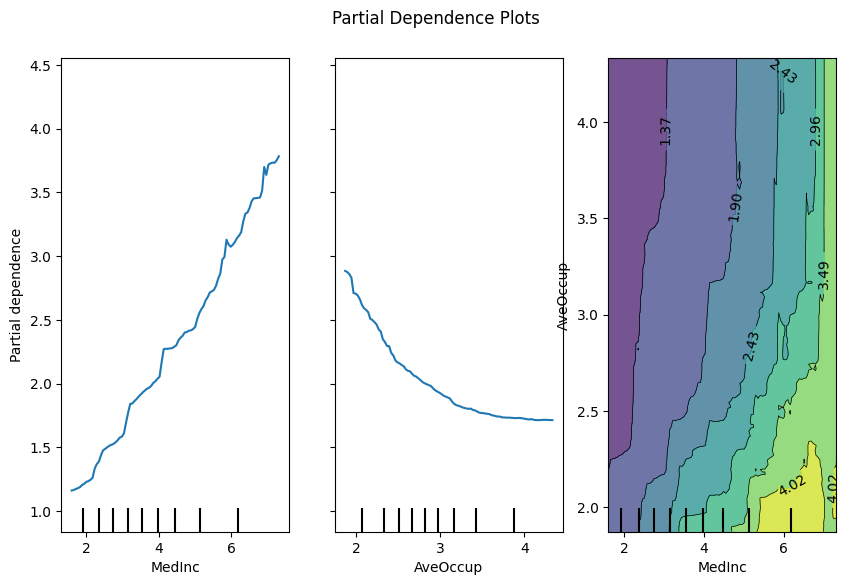

In [56]:
# Partial Dependence Plot
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_model, features=[0, 5, (0, 5)], feature_names = feature_names, X=X_train, ax=ax)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)
plt.show()

# SHAP Values

SHAP (SHapley Additive exPlanations) values provide a unified way to interpret the output of any machine learning model. SHAP values can be used to understand the impact of each feature on a specific prediction.

In [55]:
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(rf_model, X_train)

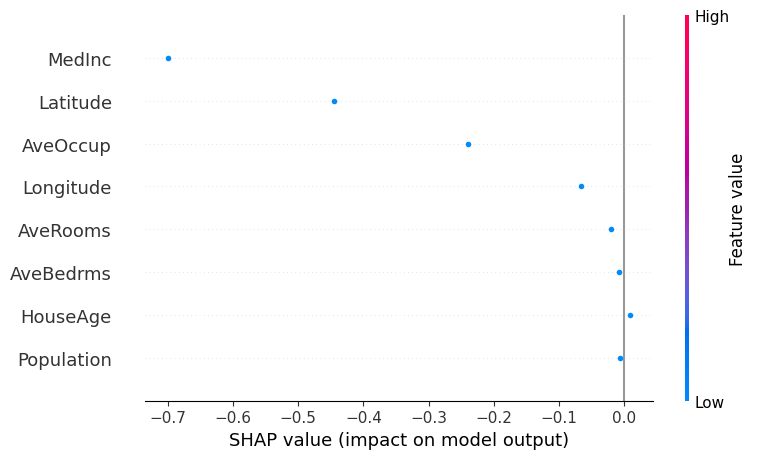

In [62]:
# Calculate SHAP values for a specific data point (e.g., the first test instance)
instance = X_test[0:1]
shap_values = explainer(instance)
# Summary plot of SHAP values
shap.summary_plot(shap_values.values, X_test[0:1], feature_names=feature_names)

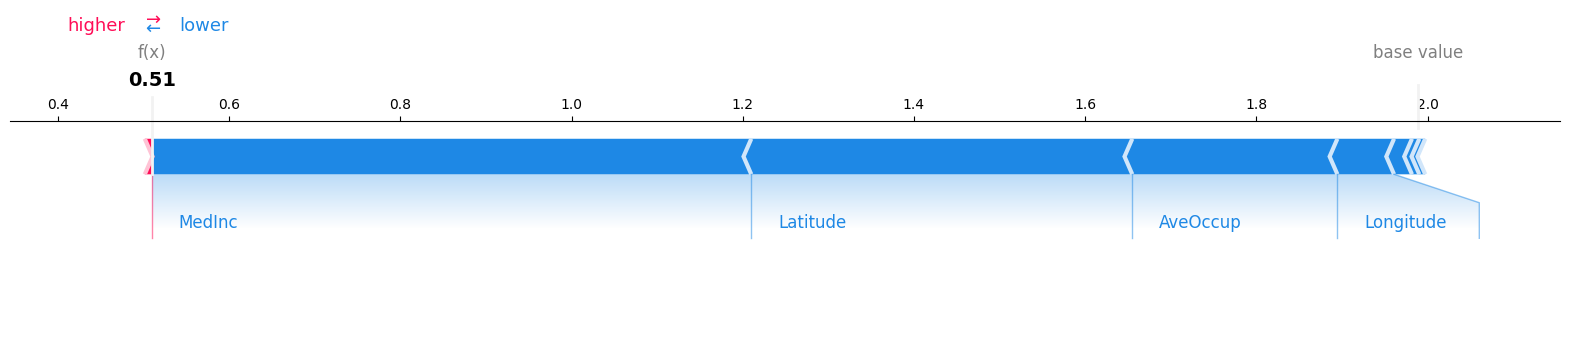

In [63]:
# Force plot for the first instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values, feature_names=feature_names, matplotlib=True)


In [70]:
shap_values

.values =
array([[-0.70016982,  0.00831899, -0.02093373, -0.00856538, -0.00691115,
        -0.23960631, -0.4450838 , -0.06619276]])

.base_values =
array([1.98897222])

.data =
array([[ 1.68120000e+00,  2.50000000e+01,  4.19220056e+00,
         1.02228412e+00,  1.39200000e+03,  3.87743733e+00,
         3.60600000e+01, -1.19010000e+02]])

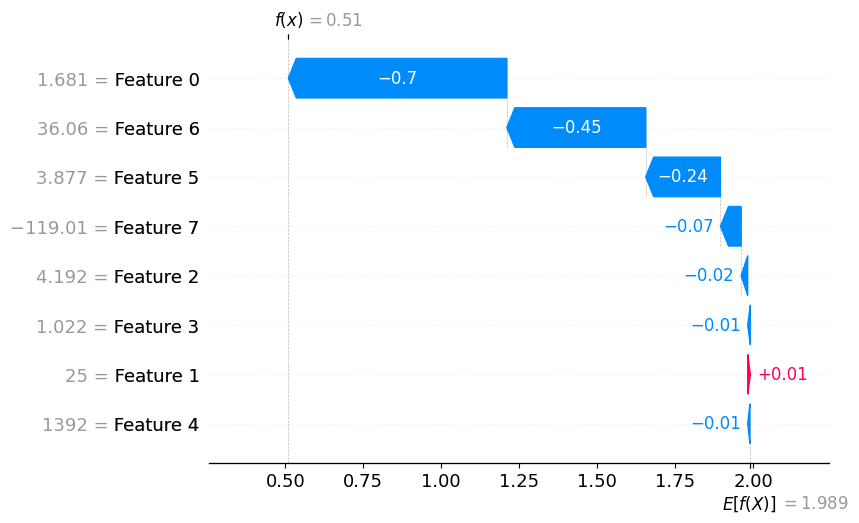

In [72]:
# Waterfall plot for the first instance
shap.plots.waterfall(shap_values[0])

In [73]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [74]:
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(rf_model, X_train)
instance = X_test
shap_values = explainer(instance)
# Summary plot of SHAP values
shap.summary_plot(shap_values.values, X_test, feature_names=feature_names)

100%|===================| 4108/4128 [03:26<00:01]        

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 1.388018, while the model output was 1.314670. If this difference is acceptable you can set check_additivity=False to disable this check.

In [ ]:
shap.plots.beeswarm(shap_values_ebm)